In [1]:
library(e1071)

# 1

In [2]:
train_data = read.table('svmdata1.txt', sep = '\t', header = T, stringsAsFactors = T)
test_data = read.table('svmdata1test.txt', sep = '\t', header = T, stringsAsFactors = T)

[1] "Support vectors number:  2"
[1] "Train error:  0"
[1] "Test error:  0"


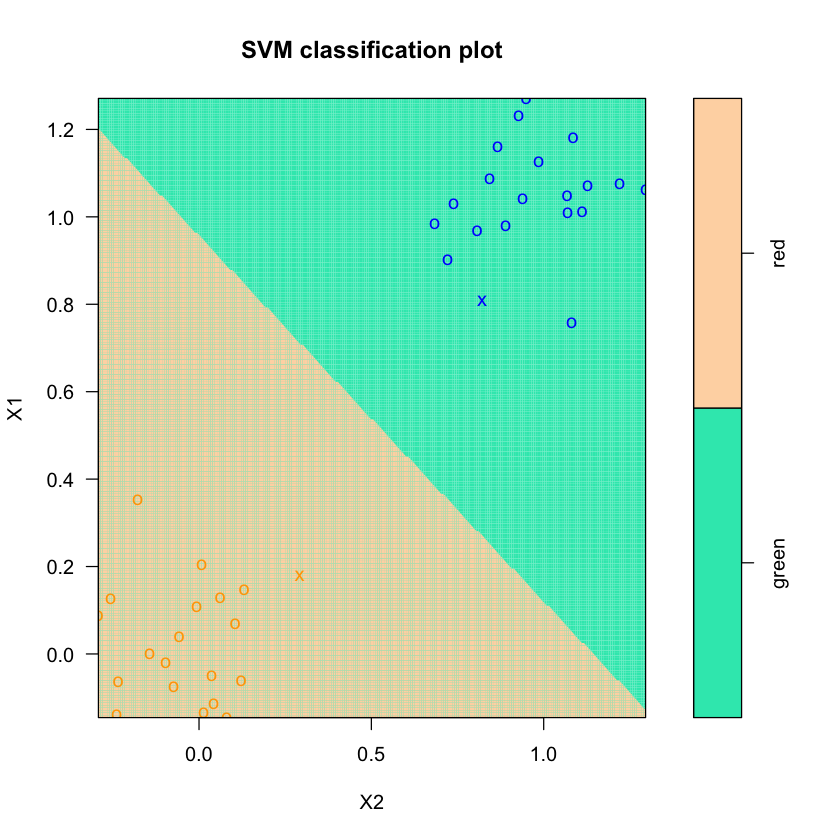

In [3]:
svm_clsfr = svm(Color ~ ., 
                 data = train_data,
                 type = "C-classification",
                 cost = 1,
                 kernel = "linear")

area_pallete = function(n = 3) {
    colors = rainbow(n)
    colors[1:2] = c("#2ee8bb", "#FED8B1")

    return(colors) 
}

plot(svm_clsfr, 
     train_data,
     grid = 250,
     symbolPalette = c("blue", "orange"),
     color.palette = area_pallete)

print(paste("Support vectors number: ", sum(svm_clsfr$nSV)))

pred_train <- predict(svm_clsfr, train_data)
tbl_train <- table(pred_train, train_data$Color)
print(paste("Train error: ", 1. - sum(diag(tbl_train)) / nrow(train_data)))

pred_test <- predict(svm_clsfr, test_data)
tbl_test <- table(pred_test, test_data$Color)
print(paste("Test error: ", 1. - sum(diag(tbl_test)) / nrow(test_data)))

# 2

In [4]:
train_data = read.table('svmdata2.txt', sep = '\t', header = T, stringsAsFactors = T)
test_data = read.table('svmdata2test.txt', sep = '\t', header = T, stringsAsFactors = T)

In [5]:
find_c_with_zero_error <- function(data_train, data_test) {
    error = 1.
    eps = 1e-10
    cost = 1
  
    while (error > eps) {
        svm_clsfr = svm(Colors ~ ., 
                     data = data_train,
                     type = "C-classification",
                     cost = cost,
                     kernel = "linear")
        pred = predict(svm_clsfr, data_test)
        tbl = table(pred, data_test$Color)
    
        error = 1. - sum(diag(tbl)) / nrow(data_test)
        cost = cost + 1
      }

    return(cost - 1)
}

print(paste("Train minimal C - ", find_c_with_zero_error(train_data, train_data)))
print(paste("Test minimal C - ", find_c_with_zero_error(train_data, test_data)))

[1] "Train minimal C -  183"
[1] "Test minimal C -  1"


# 3

In [6]:
train_data = read.table('svmdata4.txt', sep = '\t', header = T, stringsAsFactors = T)
test_data = read.table('svmdata4test.txt', sep = '\t', header = T, stringsAsFactors = T)

In [7]:
get_error <- function(kernel) {
  svm_clsfr = svm(Colors ~ ., 
                   data = train_data,
                   type = "C-classification",
                   cost = 1,
                   kernel = kernel)
  
    pred = predict(svm_clsfr, test_data)
    tbl = table(pred, test_data$Color)
    return(1. - sum(diag(tbl)) / nrow(test_data))
}

kernels = c("polynomial", "radial", "sigmoid")
errors = sapply(kernels, function(kernel) {get_error(kernel)})

print(errors)

get_min_error <- function(errors, kernels) {
    max = 1
    current_position = 1
    
    sapply(errors, function(error) { max <<- if(error < errors[max]) current_position else max
                                    current_position <<- current_position + 1
                                    })
    kernels[max]
}

get_pol_error <- function(degree) {
  svm_clsfr = svm(Colors ~ ., 
                   data = train_data,
                   type = "C-classification",
                   cost = 1,
                   kernel = "polynomial",
                   degree = degree)
  
  pred = predict(svm_clsfr, test_data)
  tbl = table(pred, test_data$Color)
    
  return(1. - sum(diag(tbl)) / nrow(test_data))
}

for (deg in 1:20) {
  print(paste('Degree ', deg, ' - ', get_pol_error(deg)))
}

polynomial     radial    sigmoid 
     0.130      0.110      0.195 
[1] "Degree  1  -  0.135"
[1] "Degree  2  -  0.51"
[1] "Degree  3  -  0.13"
[1] "Degree  4  -  0.495"
[1] "Degree  5  -  0.21"
[1] "Degree  6  -  0.495"
[1] "Degree  7  -  0.245"
[1] "Degree  8  -  0.495"
[1] "Degree  9  -  0.26"
[1] "Degree  10  -  0.5"
[1] "Degree  11  -  0.285"
[1] "Degree  12  -  0.505"
[1] "Degree  13  -  0.295"
[1] "Degree  14  -  0.505"
[1] "Degree  15  -  0.295"
[1] "Degree  16  -  0.5"
[1] "Degree  17  -  0.305"
[1] "Degree  18  -  0.5"
[1] "Degree  19  -  0.315"
[1] "Degree  20  -  0.49"


# 4

# 5

In [8]:
train_data = read.table('svmdata5.txt', sep = '\t', header = T, stringsAsFactors = T)
test_data = read.table('svmdata5test.txt', sep = '\t', header = T, stringsAsFactors = T)

polynomial     radial    sigmoid 
0.57500000 0.08333333 0.53333333 


ERROR: Error in if (is.null(formula) && ncol(data) == 3) {: пропущенное значение, а нужно TRUE/FALSE


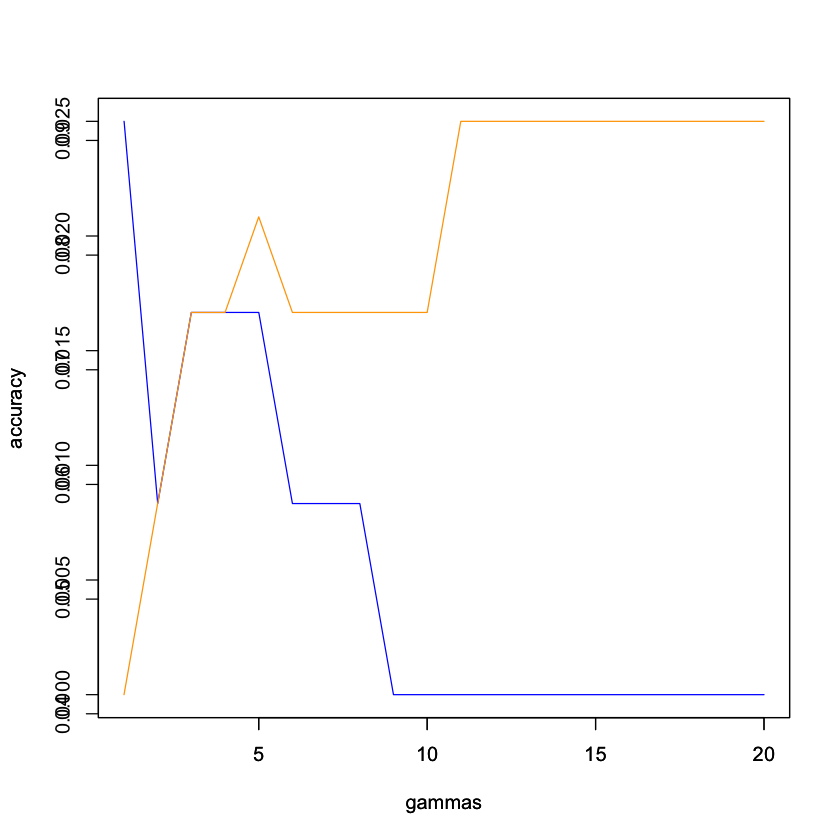

In [13]:
kernels = c("polynomial", "radial", "sigmoid")
errors = sapply(kernels, function(kernel) {get_error(kernel)})

print(errors)

best_kernel = get_min_error(errors, kernels)

get_gamma_error <- function(gamma, test_data) {
  svm_clsfr = svm(Colors ~ ., 
                   data = train_data,
                   type = "C-classification",
                   cost = 1,
                   kernel = best_kernel,
                   gamma = gamma)
  
  pred = predict(svm_clsfr, test_data)
  tbl = table(pred, test_data$Color)

  return(1. - sum(diag(tbl)) / nrow(test_data))
}

gammas = seq(1, 20, 1)
y_train = sapply(gammas, function(gamma) {get_gamma_error(gamma, train_data)})
y_test = sapply(gammas, function(gamma) {get_gamma_error(gamma, test_data)})

plot(gammas, y_train, type = 'l', xlab = 'gammas', ylab = 'accuracy', col = 'blue')
par(new=TRUE)
plot(gammas, y_test, type = 'l', xlab = 'gammas', ylab = 'accuracy', col = 'orange')

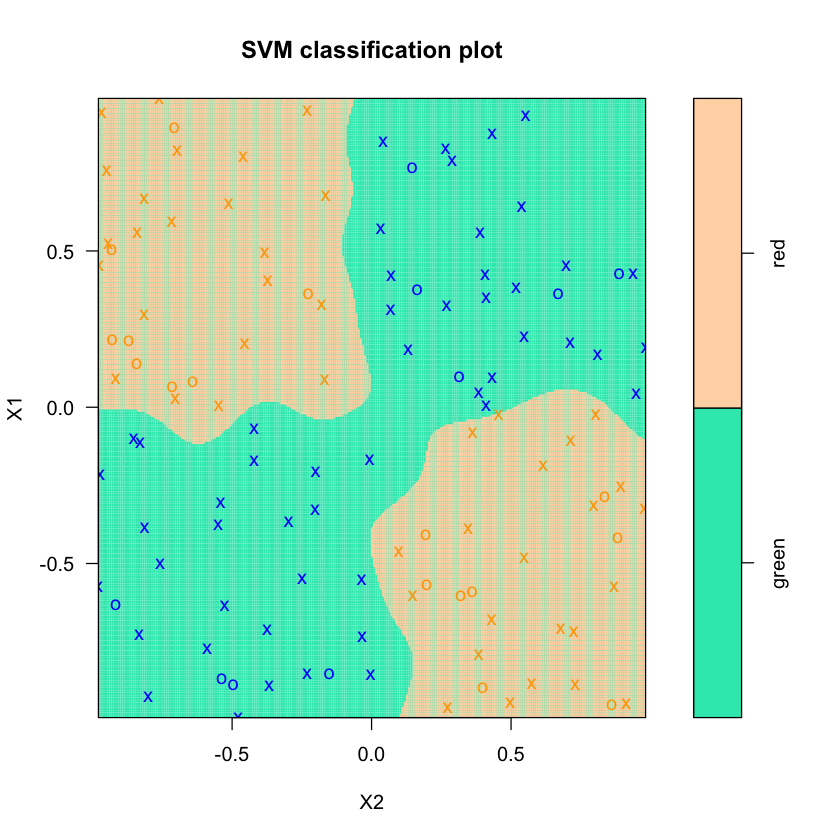

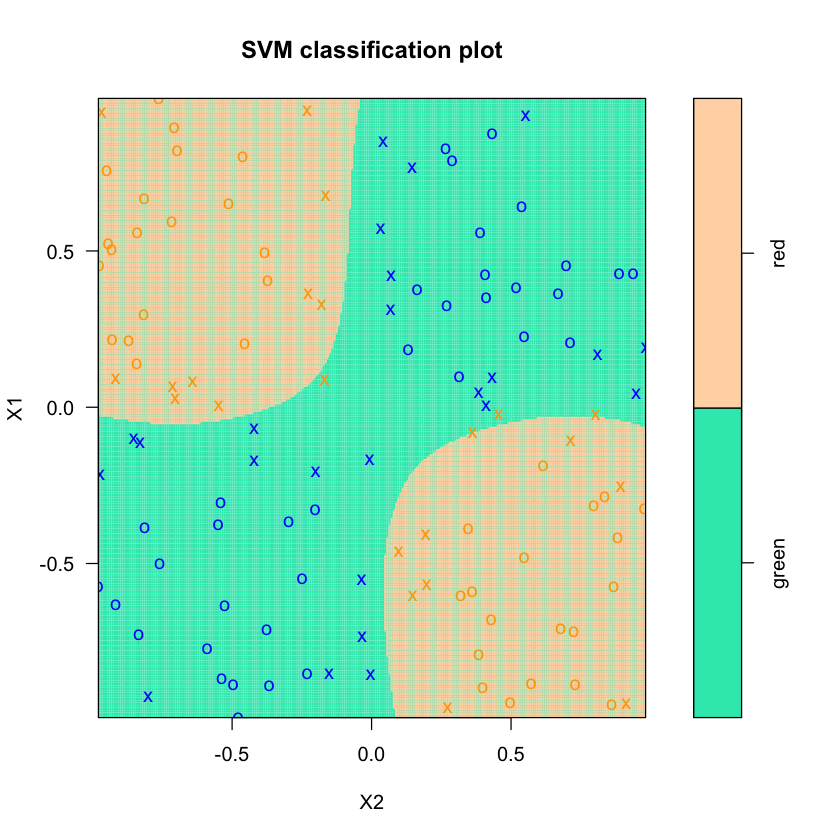

In [17]:

svm_clsfr_overfitted = svm(Colors ~ ., 
                            data = train_data,
                            type = "C-classification",
                            cost = 1,
                            kernel = "radial",
                            gamma = 11)

plot(svm_clsfr_overfitted, 
     train_data,
     grid = 250,
     symbolPalette = c("blue", "orange"),
     color.palette = area_pallete)

svm_clsfr_ok = svm(Colors ~ ., 
                    data = train_data,
                    type = "C-classification",
                    cost = 1,
                    kernel = "radial",
                    gamma = 1)

plot(svm_clsfr_ok, 
     train_data,
     grid = 250,
     symbolPalette = c("blue", "orange"),
     color.palette = area_pallete)

# 6

In [ ]:
install.packages('MLmetrics')

Installing package into ‘/usr/local/lib/R/4.0/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’, ‘ROCR’




In [20]:
library(MLmetrics)


Attaching package: ‘MLmetrics’


The following object is masked from ‘package:base’:

    Recall




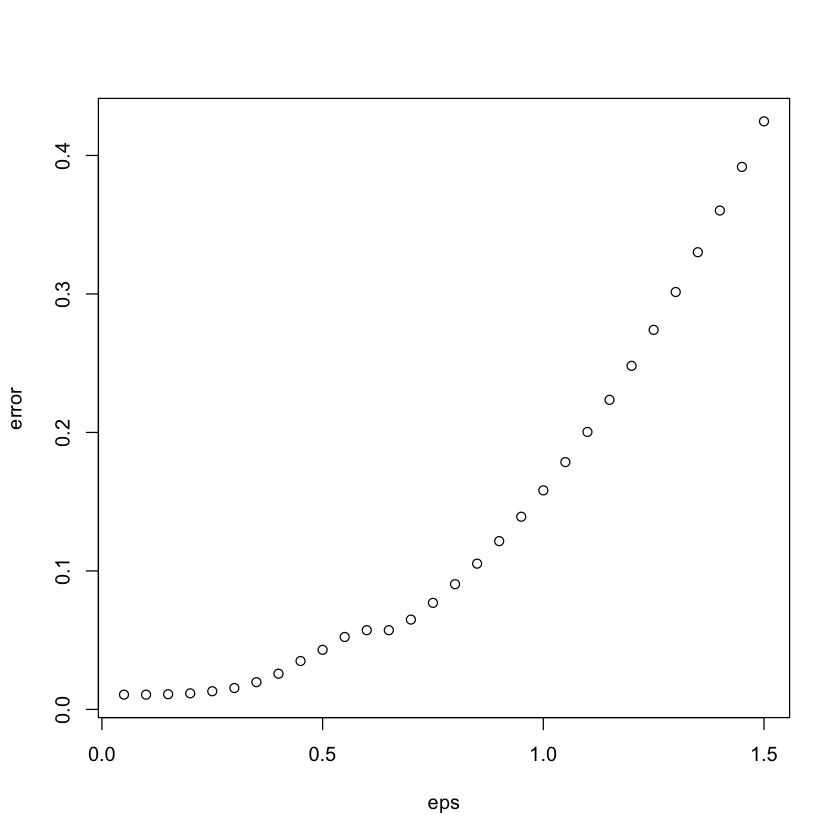

[1] 0.01067491

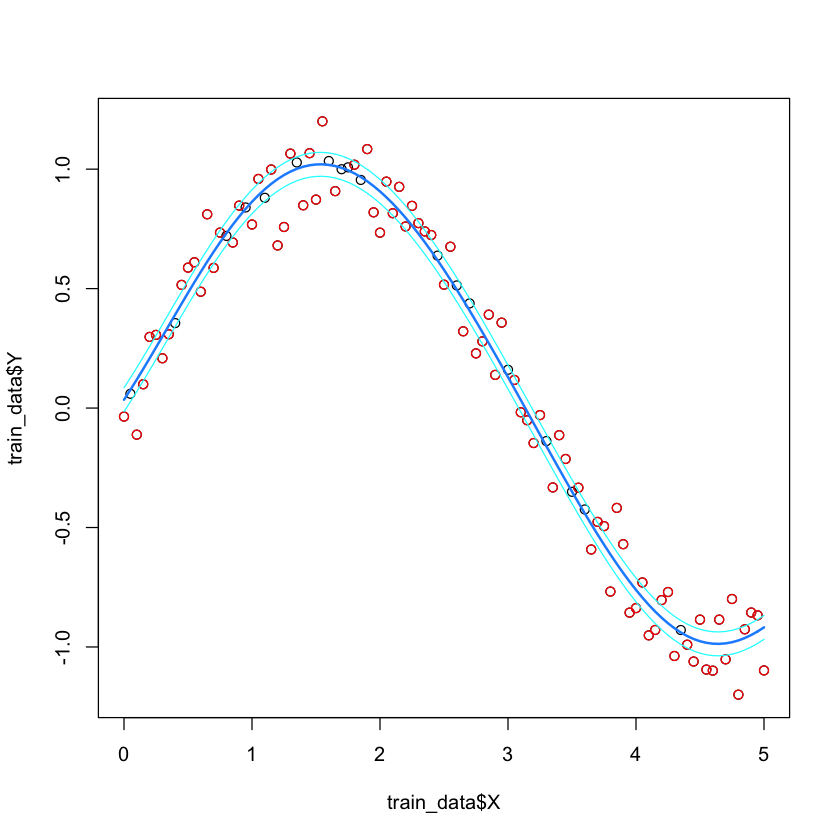

[1] 0.02578438

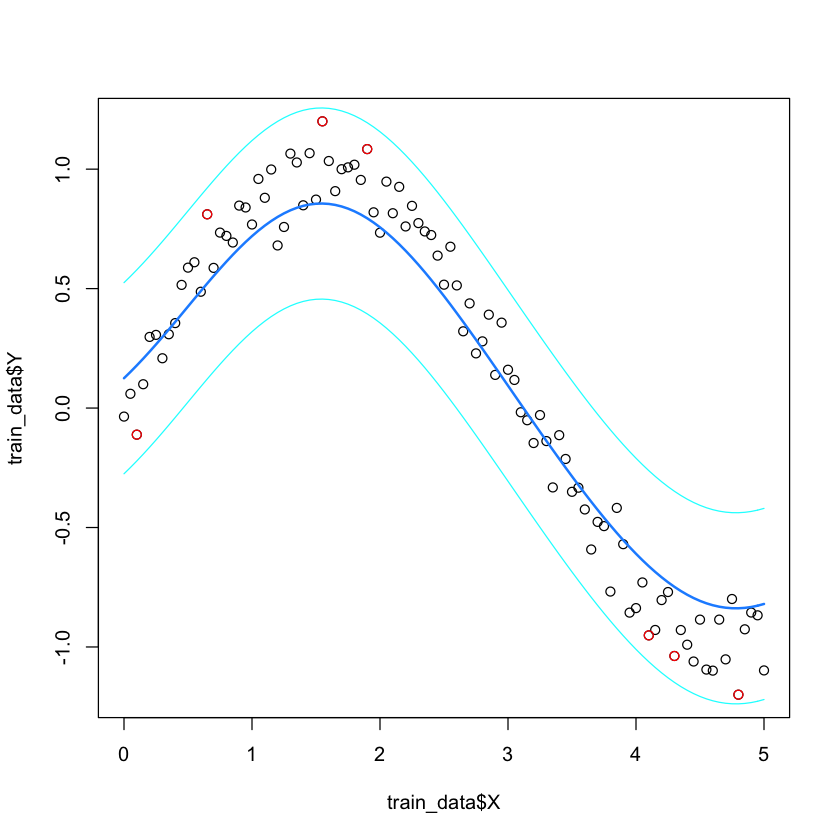

In [40]:
train_data <- read.table('svmdata6.txt', sep = '\t', header = T, stringsAsFactors = T)


get_error <- function(eps, flag=FALSE) {
    svm_model = svm(train_data$X, 
                  train_data$Y, 
                  type = "eps-regression", 
                  cost = 1, 
                  kernel = "radial", 
                  epsilon = eps,
                  cross = 1)
    
    if (flag) {
        plot(train_data$X, train_data$Y)
        points(train_data$X[svm_model$index], train_data$Y[svm_model$index], col = "red")
    }
    
    predctions = predict(svm_model, train_data$X)
    
    if (flag) {
        lines(train_data$X, predctions, col = "dodgerblue", lwd = 2) 
        lines(train_data$X, predctions + svm_model$epsilon, col = "cyan")
        lines(train_data$X, predctions - svm_model$epsilon, col = "cyan")
    }
    
    return(MSE(predctions, train_data$Y))
}

eps = seq(0.05, 1.5, by = 0.05)
errors = sapply(eps, get_error)

plot(eps, errors, xlab = 'eps', ylab = 'error')

get_error(0.05, TRUE)
get_error(0.4, TRUE)